Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **48 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Alicia Wang"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Hiring problem and random variables

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1 [time estimate: 5 minutes]
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [8]:
def hire_assistant(applicants):
    """
    This function should output the number of assistants hired.
    
    Parameters
    ----------
    applicants : list
        A list of the numbers that represent the level of qualification of 
        the applicants; the higher the number, the better qualified.
        
    Returns
    -------
    hires : int
        Number of assistants hired.
    
    """
    best = 1 #candidate 0 is a least-qualified dummy candidate
    for i in range(len(applicants)+1): #iterate through the list of applicants
        if i > best: #interview candidate i and if i is better than the current best
            best = i #set i as best
        return best #return the last best

In [9]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2 [time estimate: 5 minutes]

Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [10]:
import random
def experimental_hires(N):
    hire = random.randint(1, N); 
    return hire

In [14]:
experimental_hires(30)
experimental_hires(30)

4

## Question 3 [time estimtate: 10 minutes]

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [15]:
def analytical_hires(N):
    """
    This function returns the analytical expected number of
    hires if there are N applicants
    
    Parameters
    ----------
    N : int
        Number of applicants
        
    Returns
    -------
    hires : float
        Average number of assistants hired
    
    Note
    ----
    From the textbook, we know that the analytical result is
    
        1 + 1/2 + 1/3 + ... + 1/N
        
    """
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

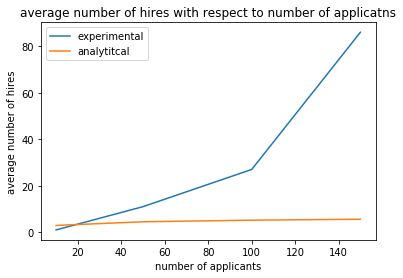

In [18]:
import matplotlib.pyplot as plt
experimental = [] #create lists
analytical = []
n = [10, 50, 100, 150] #create the list of number of applicants
fig, ax = plt.subplots()

for i in n: #iterate through the number of applicants
    experimental.append (experimental_hires(i)) #add the results of the function experimenta_hires to the list experimental
    analytical.append (analytical_hires(i)) #add the results of the function analytical_hires to the list analytical

ax.plot(n,experimental, label="experimental") #label the graphs
ax.plot(n,analytical, label="analytitcal")

ax.set_xlabel('number of applicants') 
ax.set_ylabel('average number of hires') 
ax.set_title('average number of hires with respect to number of applicatns') 

leg = ax.legend()

## Question 4 [time estimate: 10 minutes]

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

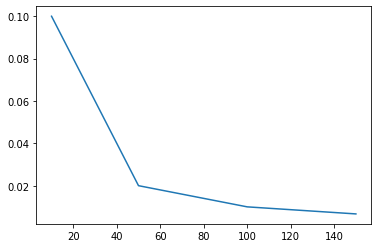

In [19]:
# there is  1/n probability that 1 will be hired and n is the number of applicants
import math 
import matplotlib.pyplot as plt
import random

n = [10, 50, 100, 150] #create the list of number of applicants
c = [] #probability
for i in n:
    c.append(1/i)
plt.plot(n, c) #plot
plt.show()

## [Optional] Question 5 [time estimate: 15 minutes]
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1 [time estimate: 3 minutes]
Knowing that everyone’s hats are unique and every guest has a hat, do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

Yes because it may seem as if the candidates are being presented to us in a random order, but we have no way of knowing whether or not they really are.


## Question 2 [time estimate: 3 minutes]

Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants
```
**Command 1.**
```
hat_list = [np.random.integers(0,n) for i in range(n)]
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2 as we need to shuffle the list not generate random integers or select random samples

## Question 3 [time estimate: 5 minutes]

Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [20]:
import numpy as np #importing libraries
import random
def hat_check(N):
    hat_list = list(range(N)) #the list of hats
    np.random.shuffle(hat_list) #shuffle the hats
    correct = 0 #set the initial correct hats to zero
    for a in range(N): #iterate through N
        if a == hat_list[a]: #if one original hat is in the same order as in the shuffled list of hats
            correct =+ 1 #add one to correct hats
    return correct #return the correct hats

## Question 4 [time estimate: 7 minutes]

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

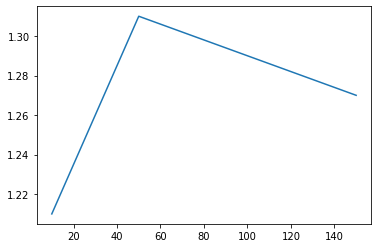

In [21]:
n = [10, 50, 100, 150] # list of numbers of applicants
correct_hats = [] # list for average number of hats correctly returned

for i in n:
    c = 0 # current total of hats correctly returned
    for x in range (200): 
        c += hat_check(i) #add the results from the previous function to the current total we have
    correct_hats.append (c/100) #calculate the average and add it to the list of correct_hats
plt.plot(n, correct_hats) #plot
plt.show()

## [Optional] Question 5 [time estimate: 15 minutes]

As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE